Homework #3 Luke Sanderson STAT411 

In [93]:
import numpy as np                   # Numerical computation library
import pandas as pa                  # Dataframe and Data manipulation Library
import matplotlib.pyplot as plt      # Basic plotting functionality Library
import seaborn as sn                 # Advanced Data visualization Library
import numpy.random as rn
from sklearn.linear_model import LinearRegression
import matplotlib.colors as pltco # A package to help with coloring plots


[x for x in dir(list) if not '__' in x]
  
# Curreny Exchange Rates compared to the US dollar from around the world 22 for 2008-2018
rates = pa.read_csv('https://www.dropbox.com/s/9lfaraup2yv30s5/FRB_H10.csv?dl=1')


rates.head()   

# First 5 rows inclues the description and then the first 4 entries


,DATE,AUSTRALIA,EURO,NEWZEALAND,UNITEDKINGDOM,BRAZIL,CANADACANADIAN,CHINA_YUAN/US,DENMARK_KRONER/US,HONG KONG_HK/US,...,NORWAY_KRONER/US,SOUTH AFRICA_RAND/US,SINGAPORE_SINGAPORE/US,KOREA_WON/US,SRI LANKA_RUPEES/US,SWEDEN_KRONOR/US,SWITZERLAND_FRANCS/US,TAIWAN_ NT/US,THAILAND_US,Venezuela_Bolivar/US
0,1/2/08,0.8812,1.4738,0.7732,1.9824,1.7681,0.9922,7.2946,5.058,7.8107,...,5.4034,6.8125,1.4375,936.6,108.53,6.3966,1.1174,32.44,29.85,2.1446
1,1/3/08,0.8819,1.4736,0.7752,1.9733,1.7496,0.9905,7.2755,5.0564,7.8047,...,5.346,6.86,1.4351,936.2,108.66,6.3547,1.1134,32.43,29.83,2.1446
2,1/4/08,0.8762,1.4786,0.7712,1.9757,1.7607,0.9988,7.2695,5.038,7.8003,...,5.3221,6.867,1.4322,938.1,108.6,6.3352,1.1064,32.42,29.7,2.1446
3,1/7/08,0.8712,1.4684,0.7665,1.9703,1.7679,1.005,7.2705,5.0721,7.8015,...,5.3819,6.9255,1.4365,940,108.5,6.3821,1.1176,32.49,29.75,2.1446
4,1/8/08,0.8812,1.4717,0.7718,1.9731,1.7565,0.9985,7.267,5.0607,7.8016,...,5.357,6.873,1.432,939,108.4,6.3752,1.1138,32.46,29.7,2.1446


These are my methods that help remove any "bad" data from my csv file.
I have to remove the string ND and then I found some extra rows that
needed to be removed.

In [94]:
rates = rates[rates.BRAZIL != 'ND']
rates = rates[rates.EURO != 'ND']
rates = rates[rates.AUSTRALIA != 'ND']
rates = rates[rates.iloc[:,23]!= 'ND']
rates = rates[rates.iloc[:,10]!= 'ND']


In [144]:
rates["BRAZIL"] = rates.BRAZIL.astype(float)
rates["AUSTRALIA"] = rates.AUSTRALIA.astype(float)
rates['EURO'] = rates.EURO.astype(float)
rates['NEWZEALAND'] = rates.NEWZEALAND.astype(float)
rates['UNITEDKINGDOM'] = rates.UNITEDKINGDOM.astype(float)
rates['CANADACANADIAN'] = rates.CANADACANADIAN.astype(float)

In [87]:
rates.shape  # Finds the shape of my data frame so I know how many rows and columns

(2750, 24)

This method searches for the extra instances where the string ND appears in my data frame that already havent been removed by the previous methods

In [22]:
# Produce a numpy array with the rates from BRAZIL and AUSTRALIAUS

X = np.atleast_2d(np.array([float(h) for h in rates.loc[:, 'BRAZIL']])).transpose()
# Recall that we need an array of shape (n, 1) and so there are some numpy.array manipulations needed
y = np.atleast_2d(np.array([float(h) for h in rates.loc[:, 'AUSTRALIA']])).transpose()

z = np.atleast_2d(np.array([float(h) for h in rates.loc[:, 'EURO']])).transpose()

a = np.array(rates.loc[:, 'AUSTRALIA'])


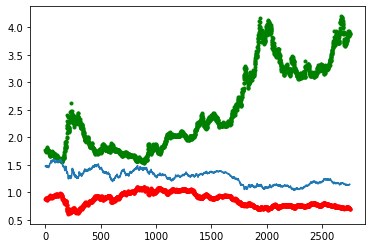

In [23]:
plt.plot(X,'g.',y,'r.',z,'')

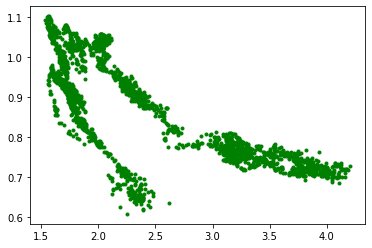

In [24]:
plt.plot(X,y, "g.")


Below we have my method for using my graphs from above and apply linear regression models to them. I used linear for the first graph I made which is a relation between BRAZIL and AUSTRALIAUS. It creates a red line that follows the trend of the graphs. 

### Linear Regression

In [25]:
# We shuffle the data using a random permutation

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]


In [27]:
reg = LinearRegression().fit(X_train, y_train)
b, m = reg.intercept_, *reg.coef_
b, m

(array([1.17130255]), array([-0.12294942]))

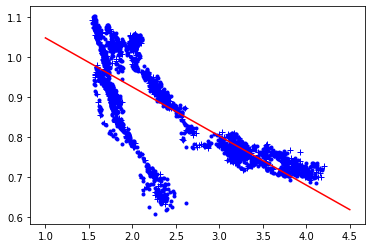

In [28]:
plt.plot(X_train, y_train, 'b.')
plt.plot(X_test, y_test, 'b+')
xx = np.linspace(1, 4.5, 50)
yy = b + m*xx
plt.plot(xx, yy, 'r-');


In [70]:
reg.score(X_train,y_train), reg.score(X_test,y_test)

(0.7076057877643147, 0.7137726513343052)

### Bootstrap 1  ??? 

In [30]:
# We shuffle the data using a random permutation

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
R2 = pa.DataFrame( np.array([ [0]*5, [0]*5]).transpose(), columns = ['train', 'test'])
# Making a DataFrame to record the R2 values in

for k in range(5):
    X_test = X[k*test:(k+1)*test]       # Then create the test
    y_test = y[k*test:(k+1)*test]
    X_train = np.concatenate( (X[:k*test], X[(k+1)*test:]), axis=0)     # and train sets
    y_train = np.concatenate( (y[:k*test], y[(k+1)*test:]), axis=0)
    reg = LinearRegression().fit(X_train, y_train)
    
    R2.loc[k, 'train'] = reg.score(X_train, y_train)
    R2.loc[k, 'test'] = reg.score(X_test, y_test)

R2mean = [0]*2
R2std = [0]*2
for c in range(2):
    R2mean[c] = np.mean(R2.iloc[0:5, c])
    R2std[c] = np.std(R2.iloc[0:5, c])
    
R2 = R2.append( pa.Series(R2mean, index=R2.columns), ignore_index=True )
R2 = R2.append( pa.Series(R2std, index=R2.columns), ignore_index=True)
R2.index = [0, 1, 2, 3, 4, 'Mean', 'Standard Deviation']
R2




,train,test
0,0.595212,0.575278
1,0.590727,0.593531
2,0.583385,0.622259
3,0.591918,0.588724
4,0.595715,0.571974
Mean,0.591391,0.590353
Standard Deviation,0.004430,0.017865


### Bootstrap 2 

In [96]:
num = 40 # number of bootstraps to use
Xboot = [0]*num
yboot = [0]*num

n = X.shape[0]
for k in range(num):
    sample = np.random.randint(0, n, n)  # Note here starting with a random permutation is not necessary
    Xboot[k] = X[sample, :]
    yboot[k] = y[sample]

In [97]:
test = int(0.20*n)
R2 = pa.DataFrame( np.array([ [0]*num]*4).transpose(), columns = ['train_1', 'test_1', 'train_2', 'test_2'])

for k in range(num):
    X_test = Xboot[k][:test]
    y_test = yboot[k][:test]
    X_train = Xboot[k][test:]
    y_train = yboot[k][test:]
    reg = LinearRegression().fit(X_train, y_train)
    reg2 = LinearRegression().fit(X_train[:, 0:6], y_train)
    
    R2.loc[k, 'train_1'] = reg.score(X_train, y_train)
    R2.loc[k, 'test_1'] = reg.score(X_test, y_test)
    R2.loc[k, 'train_2'] = reg2.score(X_train[:, 0:6], y_train)
    R2.loc[k, 'test_2'] = reg2.score(X_test[:, 0:6], y_test)
    
R2mean = [0]*4
R2std = [0]*4
for c in range(4):
    R2mean[c] = np.mean(R2.iloc[0:5, c])
    R2std[c] = np.std(R2.iloc[0:5, c])
    
R2 = R2.append( pa.Series(R2mean, index=R2.columns), ignore_index=True )
R2 = R2.append( pa.Series(R2std, index=R2.columns), ignore_index=True)
R2.index = list(range(num)) + ['Mean', 'Standard Deviation']
R2.tail(10)

,train_1,test_1,train_2,test_2
32,0.850983,0.835541,0.850983,0.835541
33,0.844800,0.863370,0.844800,0.863370
34,0.852998,0.853383,0.852998,0.853383
35,0.850912,0.841317,0.850912,0.841317
36,0.856831,0.863464,0.856831,0.863464
37,0.851675,0.855154,0.851675,0.855154
38,0.849422,0.838837,0.849422,0.838837
39,0.851941,0.852488,0.851941,0.852488
Mean,0.851695,0.850143,0.851695,0.850143
Standard Deviation,0.003277,0.005818,0.003277,0.005818


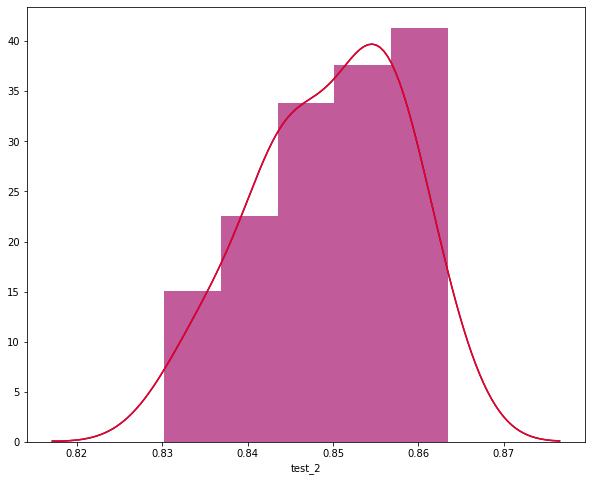

In [98]:
plt.figure(figsize = (10, 8))
sn.distplot(R2.iloc[:num, 1], color='blue')
sn.distplot(R2.iloc[:num, 3], color='red');

### K-Nearest Neighbors Regression 

In [99]:
X = np.array(rates[['BRAZIL', 'EURO']])
y = np.array(rates.iloc[:, 1])

In [100]:
# Normalize the values for X; this is needed because we are computing the distance between points so we need the two axis to have the 
# same metric
for l in range(X.shape[1]):
    X[:, l] = ( X[:, l] - min(X[:, l]))/(max(X[:, l]) - min(X[:, l]))
    

In [101]:
# Make the training and testing sets

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [102]:
from sklearn.neighbors import KNeighborsRegressor # Import the Regressor

In [103]:
# A bit of code for plotting the contour in a regression problem with two predictors
# Also prints out the training and testing errors

def plot_reg_model(reg, X_train, y_train, X_test, y_test):

    h = 0.01 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = -0.1, 1.1
    y_min, y_max = -0.1, 1.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))

Training R2: 0.8778401072816839
Testing R2: 0.8598857819108053


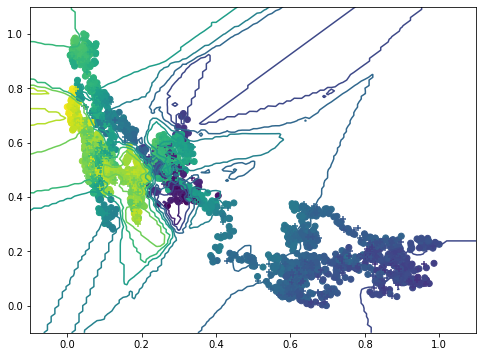

In [104]:
reg = KNeighborsRegressor(n_neighbors=10)
reg.fit(X_train, y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)

Training R2: 0.5873027722627266
Testing R2: 0.6212250617995119


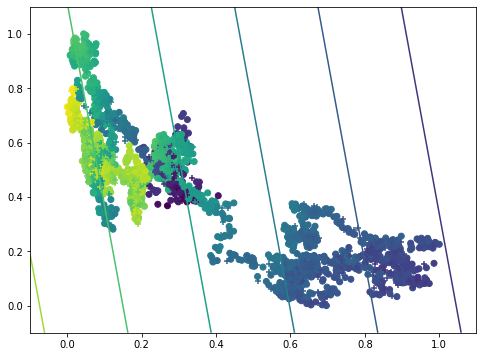

In [105]:
reg = LinearRegression()
reg.fit(X_train, y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)

### PCA Model

In [106]:
# Build a matrix of the predictors and results

X = np.array(rates.iloc[:, 1:5])
y = np.array(rates.iloc[:, 5])

In [107]:
from sklearn.decomposition import PCA

In [108]:
pca = PCA(n_components=2) # Use PCA to identify the two most important components

# component here means a linear combination of the features

Xpca = pca.fit_transform(X);

In [109]:
# The explained variance quantifies the propotion of the variation in the values of X that have been explained by each component

print(pca.explained_variance_ratio_)

[0.76078346 0.16316893]


### Use In A Model

In [118]:
def plot_reg_model(reg, X_train, y_train, X_test, y_test):

    h = 0.01 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = -0.5, 0.8
    y_min, y_max = -0.5, 0.8
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))

In [119]:
# We shuffle the data using a random permutation
import numpy.random as rn
n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
Xpca= Xpca[perm]
y = y[perm]
X_test = Xpca[:test]       # Then create the test
y_test = y[:test]
X_train = Xpca[test:]     # and train sets
y_train = y[test:]

In [120]:
from sklearn.linear_model import LogisticRegression

Training R2: 0.0006879779227988436
Testing R2: -0.00778459740510673


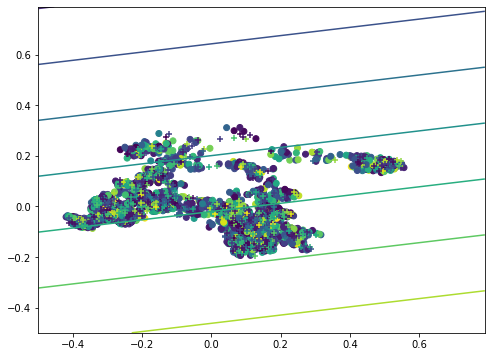

In [121]:
reg = LinearRegression()
reg.fit(X_train,y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)

### Linear Regression

In [155]:
keep = rates.columns[rates.dtypes!='object'][0:6]
keep

Index(['AUSTRALIA', 'EURO', 'NEWZEALAND', 'UNITEDKINGDOM', 'BRAZIL',
       'CANADACANADIAN'],
      dtype='object')

In [159]:
X = np.array(rates.loc[:, ['AUSTRALIA','NEWZEALAND','UNITEDKINGDOM','BRAZIL','CANADACANADIAN']])
y = np.array(rates.loc[:, 'EURO'])

In [165]:
# We shuffle the data using a random permutation

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [166]:
reg = LinearRegression().fit(X_train, y_train)
print('Training R2: {}'.format(reg.score(X_train, y_train)))
print('Testing R2: {}'.format(reg.score(X_test, y_test)))

Training R2: 0.8268884955582699
Testing R2: 0.8215834542436633


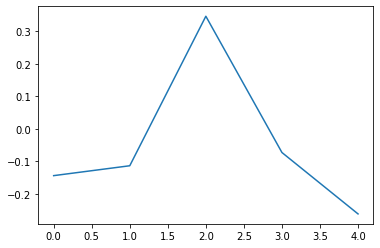

In [167]:
plt.plot(reg.coef_);

### Ridge Regression

In [148]:
keep = rates.columns[rates.dtypes!='object'][1:6]
keep

Index(['EURO', 'NEWZEALAND', 'UNITEDKINGDOM', 'BRAZIL', 'CANADACANADIAN'], dtype='object')

In [149]:
X = np.array(rates.loc[:, keep])
y = np.array(rates.loc[:, 'AUSTRALIA'])

In [150]:
# We shuffle the data using a random permutation

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [151]:
ridge_reg = Ridge(alpha=1).fit(X_train, y_train)
print('Training R2: {}'.format(ridge_reg.score(X_train, y_train)))
print('Testing R2: {}'.format(ridge_reg.score(X_test, y_test)))

Training R2: 0.9335736233980589
Testing R2: 0.9291685117123836


In [152]:
ridge_reg = Ridge(alpha=30).fit(X_train, y_train)
print('Training R2: {}'.format(ridge_reg.score(X_train, y_train)))
print('Testing R2: {}'.format(ridge_reg.score(X_test, y_test)))

Training R2: 0.7679290781227102
Testing R2: 0.7688979810398429


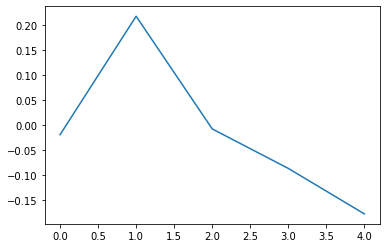

In [153]:
plt.plot(ridge_reg.coef_);

In [175]:
keep[ridge_reg.coef_.argmax()] 

'EURO'